<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Detection_of_Virus_types_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [3]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 50 (delta 30), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), 5.68 MiB | 6.41 MiB/s, done.


In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
path = os.listdir('/content/drive/MyDrive/Virus/Trainning')
classes = {'Virus - PSTV foliar symptoms':0, 'Virus - Rugose mosaic symptom':1}

In [7]:
BATCH_SIZE = 32
IMAGE_SIZE = 400
CHANNELS=2
EPOCHS=50

In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML


In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Virus/Trainning',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 532 files belonging to 2 classes.


In [10]:
class_names = dataset.class_names
class_names

['Virus - PSTV foliar symptoms', 'Virus - Rugose mosaic symptom']

In [11]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 400, 400, 3)
[1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]


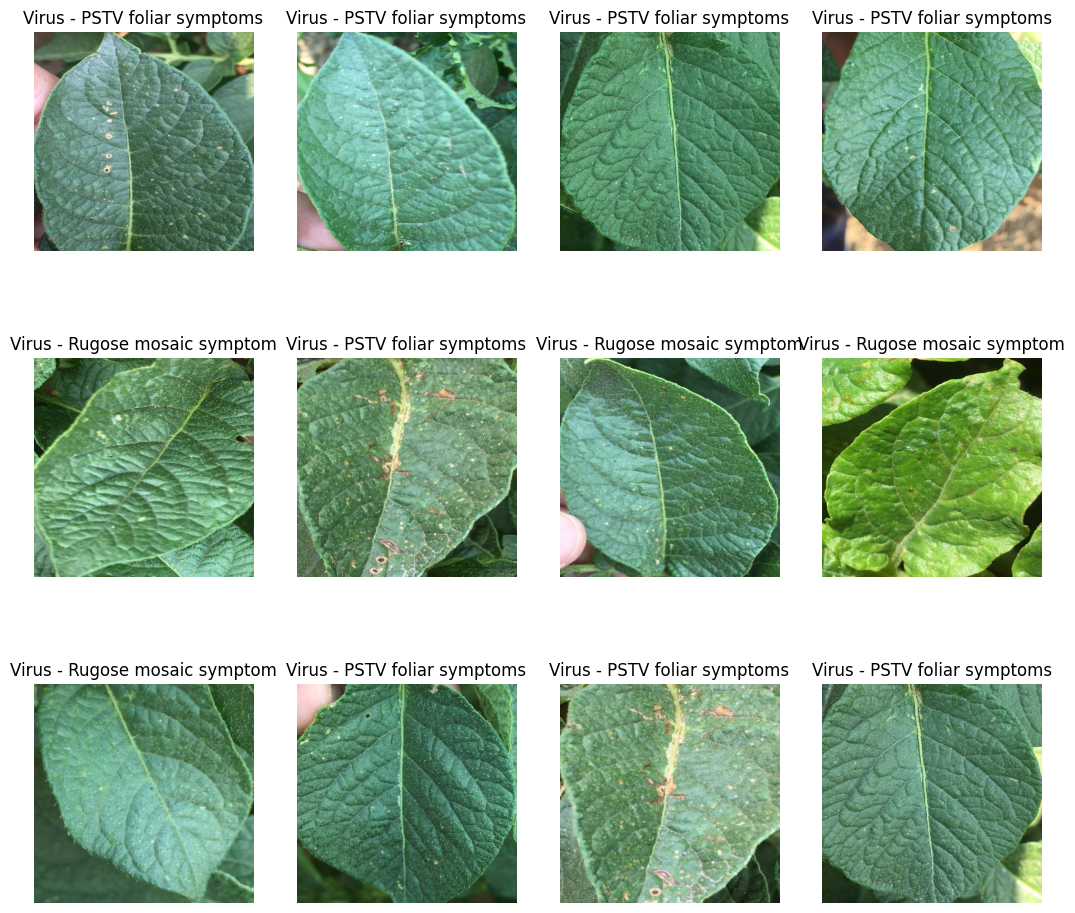

In [12]:
plt.figure(figsize=(13, 12))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
import cv2
x=[]
y=[]
z=[]
for cls in classes:
    pth = '/content/drive/MyDrive/Virus/Trainning/'+cls
    for j in os.listdir(pth):
        #img = cv2.imread(pth+'/'+j,0)
        img = cv2.imread(pth+'/'+j,0)
        img1 = cv2.resize(img, (400,400))
        x.append(img1)
        y.append(classes[cls])
        z.append(img)
        #a.append(float_img)

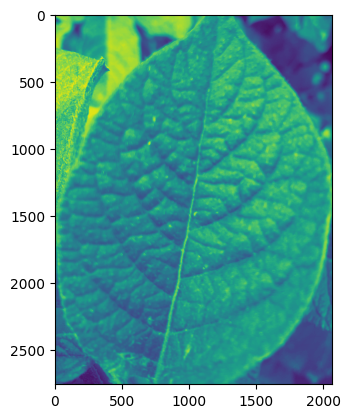

In [14]:
plt.imshow(z[100])

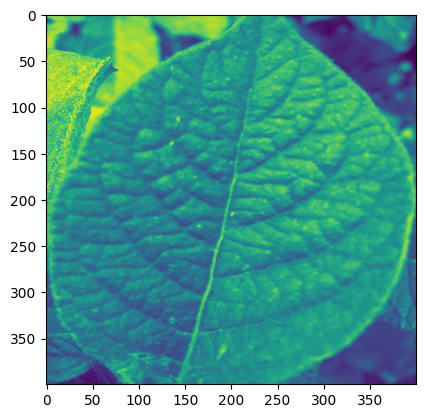

In [15]:
plt.imshow(x[100])

In [16]:
x=[]
y=[]
z=[]
for cls in classes:
    pth = '/content/drive/MyDrive/Virus/Trainning/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,1)
        img1 = cv2.resize(img, (400,400))
        #contrast improve
        color_contrast=img_as_ubyte(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        #smooth image
        smooth_image=img_as_ubyte(cv2.GaussianBlur(color_contrast, (3,3), 0, borderType=cv2.BORDER_CONSTANT))
         
        x.append(color_contrast)
        y.append(classes[cls])
        z.append(img)

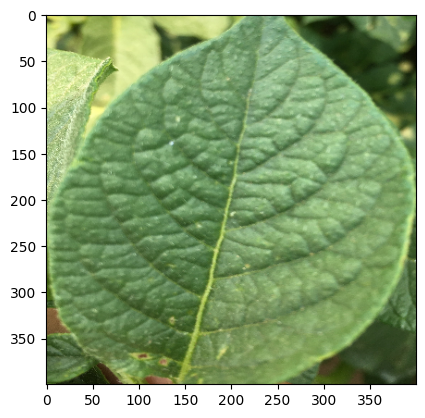

In [17]:
plt.imshow(x[100])

In [18]:
import cv2
img_no=1
x=[]
y=[]
z=[]
histo=[]
for cls in classes:
    pth = '/content/drive/MyDrive//Virus/Trainning/'+cls
    for j in os.listdir(pth):
        realimage = cv2.imread(pth+'/'+j,1)
        
        #Resize
        resizedImage = cv2.resize(realimage, (400,400))
        #contrast improve
        color_contrastImage=img_as_ubyte(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))
        #smooth image
        smooth_image=img_as_ubyte(cv2.GaussianBlur(color_contrastImage, (5,5), 0, borderType=cv2.BORDER_CONSTANT))
        
        #Histogram equalize
        R, G, B = cv2.split(smooth_image)
        op_R= cv2.equalizeHist(R)
        op_G= cv2.equalizeHist(G)
        op_B= cv2.equalizeHist(B)
        histogram_image=cv2.merge((op_R,op_G,op_B))
        
        #clahe apply
        clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
        op2_R= clahe.apply(R)
        op2_G= clahe.apply(G)
        op2_B= clahe.apply(B)
        clahe_image=cv2.merge((op2_R,op2_G,op2_B))
         
        x.append(clahe_image)
        
        y.append(classes[cls])
        z.append(realimage)
        histo.append(histogram_image)
     


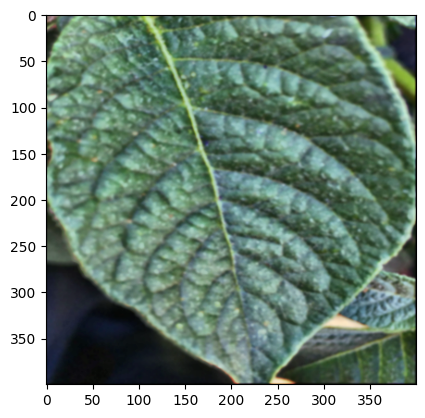

In [19]:
plt.imshow(x[150])

In [20]:
import cv2
x=[]
y=[]
z=[]
histo=[]
for cls in classes:
    pth = '/content/drive/MyDrive/Virus/Trainning/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,1)
        img1 = cv2.resize(img, (400,400))
        #contrast improve
        color_contrast=img_as_ubyte(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        #smooth image
        smooth_image=img_as_ubyte(cv2.GaussianBlur(color_contrast, (5,5), 0, borderType=cv2.BORDER_CONSTANT))
        
        #Histogram equalize
        R, G, B = cv2.split(smooth_image)
        op_R= cv2.equalizeHist(R)
        op_G= cv2.equalizeHist(G)
        op_B= cv2.equalizeHist(B)
        op1=cv2.merge((op_R,op_G,op_B))
        
        #clahe apply
        clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
        op2_R= clahe.apply(R)
        op2_G= clahe.apply(G)
        op2_B= clahe.apply(B)
        op2=cv2.merge((op2_R,op2_G,op2_B))
        
        x.append(op2)
        y.append(classes[cls])
        z.append(img)
        histo.append(op1)

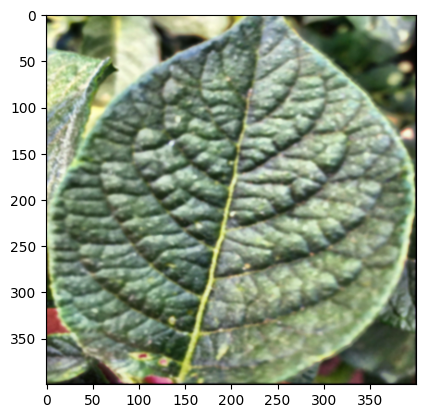

In [21]:
plt.imshow(x[100])

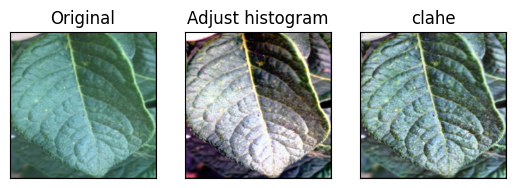

In [22]:
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))

op2_R= clahe.apply(R)
op2_G= clahe.apply(G)
op2_B= clahe.apply(B)

op2=cv2.merge((op2_R,op2_G,op2_B))
op=[smooth_image, op1,op2]
titles=['Original','Adjust histogram','clahe']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(op[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [23]:
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator

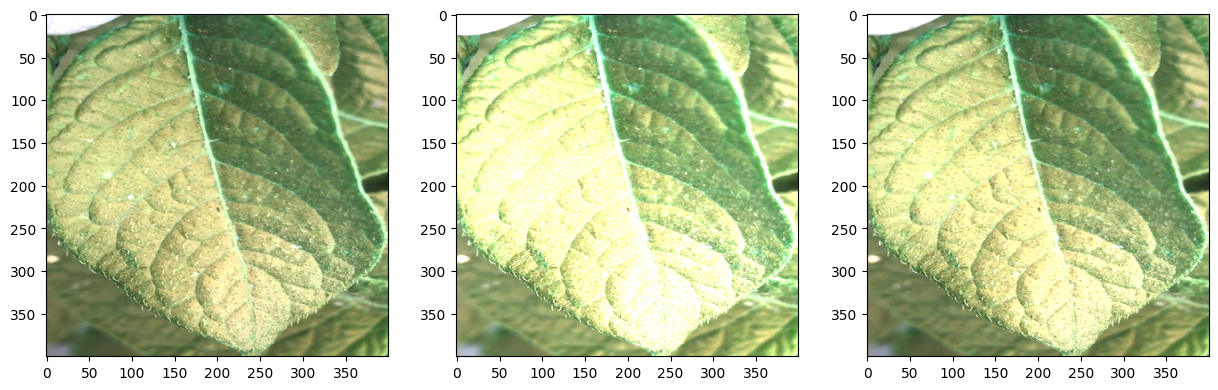

In [24]:
 # convert to numpy array
data = img_to_array(img1)

# expand dimension to one sample
samples = expand_dims(img1, 0)

# ImageDataGenerator for flipping
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    img1 = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(img1) 

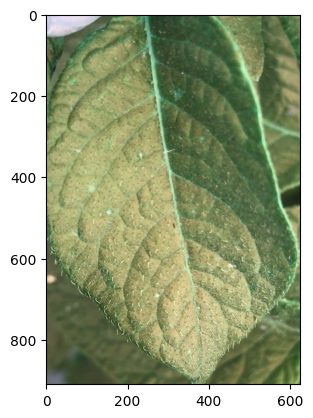

In [25]:
norm_image = (img - np.min(img)) / (np.max(img) - np.min(img))
plt.imshow(norm_image)

In [26]:
!git config --global user.email "piumi.18@itfac.mrt.ac.lk"
!git config --global user.name "Piumir3"


In [28]:
import cv2
x=[]
y=[]
z=[]
histo=[]
for cls in classes:
    pth = '/content/drive/MyDrive/Virus/Trainning/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,1)

# Convert the image to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding with a threshold value of 127
ret, threshold_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the thresholded image
 
x.append(threshold_image)
y.append(classes[cls])
z.append(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


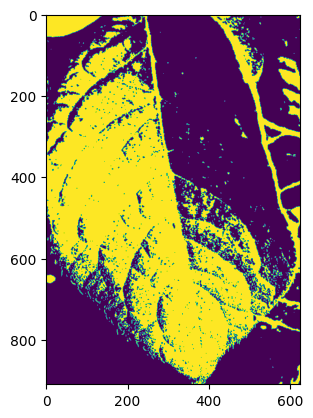

In [32]:
plt.imshow(threshold_image)